## Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import  r2_score
from sklearn.model_selection import  train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.special import boxcox1p

from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from sklearn.pipeline import Pipeline




from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso, ElasticNetCV
from sklearn.model_selection import cross_val_score
import warnings


from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')

%matplotlib inline
from matplotlib import rc, rcParams
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
import scipy.stats as stats
from scipy.special import boxcox1p
from tensorflow import set_random_seed

import warnings
    
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('./TAE/chronic_kidney_disease_full.csv')


C:\Users\Thinkpad-08\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## EDA and Data Processing

In [3]:
# Top 5 rows.
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
# Bottom 5 rows.
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [5]:
# structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


In [6]:
# select columns which need to be converted to floats
cols_to_convert = df.select_dtypes(include='object').columns.difference(['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class'])
# shape        
print('Shape df: {}'.format(df.shape))

Shape df: (400, 25)


In [7]:
# replaces ',' with '.' in the columns and convert them into numeric
df [cols_to_convert] = df[cols_to_convert].apply(lambda x: x.str.replace(",","."))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


## Null values
Now lets see if there are any null values and what features they belong to.

In [9]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Now, it can be seen that there are quiet many null value observations, in many different features we need to choice a method to use to fill these observations.

In [10]:
df.keys()

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [11]:

for col in ("age", "bp", "rbcc", "wbcc"):
    df[col] = df[col].transform(lambda x: x.fillna(x.median()))

for col in ("htn", "dm", "cad", "appet","pe","ane"):
    df[col] = df[col].fillna(0)

for col in ("rbc", "pc", "pcc", "ba"):
    df[col] = df[col].fillna(0)

for col in ('htn', 'dm', 'cad', 'appet','pe','ane'):
    df[col] = df[col].transform(lambda x: x.fillna(x.mode()))
    
for col in ('sg','al', 'su', 'bgr', 'bu','sc','sod','pot','hemo','pcv'):
    df[col] = df[col].transform(lambda x: x.fillna(x.median()))    
    
    
from sklearn.preprocessing import LabelEncoder
cols = ('age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))
    
# shape        
print('Shape df: {}'.format(df.shape))

Shape df: (400, 25)


In [12]:
#Check remaining missing values if any 
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head()

,Missing Ratio


## Univariate Analysis

class-( Having (CKD) or have (notCKD)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null int64
bp       400 non-null int64
sg       400 non-null int64
al       400 non-null int64
su       400 non-null int64
rbc      400 non-null int64
pc       400 non-null int64
pcc      400 non-null int64
ba       400 non-null int64
bgr      400 non-null int64
bu       400 non-null int64
sc       400 non-null int64
sod      400 non-null int64
pot      400 non-null int64
hemo     400 non-null int64
pcv      400 non-null int64
wbcc     400 non-null int64
rbcc     400 non-null int64
htn      400 non-null int64
dm       400 non-null int64
cad      400 non-null int64
appet    400 non-null int64
pe       400 non-null int64
ane      400 non-null int64
class    400 non-null int64
dtypes: int64(25)
memory usage: 78.2 KB


In [14]:
df.head()
#This shows that class has been categoried as 0 for CKD and 1 for notCKD.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,40,3,3,1,0,0,2,1,1,48,...,31,35,30,2,2,1,1,1,1,0
1,5,0,3,4,0,0,2,1,1,48,...,25,19,26,1,1,1,1,1,1,0
2,54,3,1,2,3,2,2,1,1,140,...,18,33,26,1,2,1,2,1,2,0
3,40,2,0,4,0,2,1,2,1,44,...,19,25,17,2,1,1,2,2,2,0
4,43,3,1,2,0,2,2,1,1,33,...,22,31,24,1,1,1,1,1,1,0


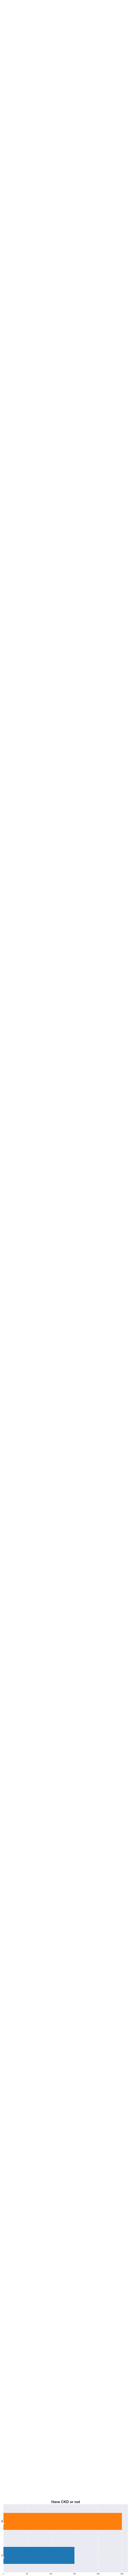

In [15]:
plt.figure(figsize=(10,6))
df['class']= df['class']

# creates horizontal bar plot
ax = df['class'].value_counts().sort_values(ascending=True).plot.barh()

# adds text to the horizontal bar plot
for i, v in enumerate(df.age.value_counts().sort_values(ascending=True)):
    ax.text(v-1.8 , i-0.1 , str(v), color='white', fontweight='bold',fontsize=14)
    
# removes the box 
plt.box(True)

# add the title
yticklabels = plt.getp(plt.gca(), 'yticklabels')
plt.setp(yticklabels, fontsize=14, weight='bold')

# adds title to the plot
plt.title('Have CKD or not',fontweight='bold',fontsize=20)
plt.tight_layout()


plt.show()

## with regards to the top 5 CKD

<Figure size 720x432 with 0 Axes>

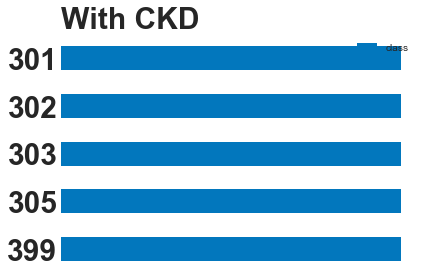

In [16]:
# to get the top 5 countries with best GDP per Capita 
top_5_CKD = df.sort_values('class',ascending=False).iloc[:5,:].sort_values('class',ascending=True)
plt.figure(figsize=(10,6))

# creates horizontal bar plot
ax = top_5_CKD.plot.barh(y='class',color='#0277BD')



# removes unnecessary ticks and labels
plt.tick_params(top='off', bottom='off', left='off', right='off',
                labelleft='on', labelbottom='off')

yticklabels = plt.getp(plt.gca(), 'yticklabels')
plt.setp(yticklabels, fontsize=30, weight='bold')

# removes the box 
plt.box(False)
# add the title
plt.title('With CKD',fontweight='bold',fontsize=30,loc='left')
plt.ylabel('')
plt.tight_layout()
plt.savefig('./Exploratory Images/top5GDP.png')
plt.show()

bp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: class, dtype: object

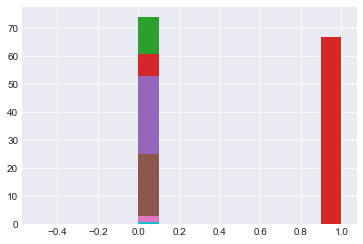

In [17]:
df['class'].groupby(df['bp']).hist()

Distributions

IndexError: index 18 is out of bounds for axis 0 with size 18

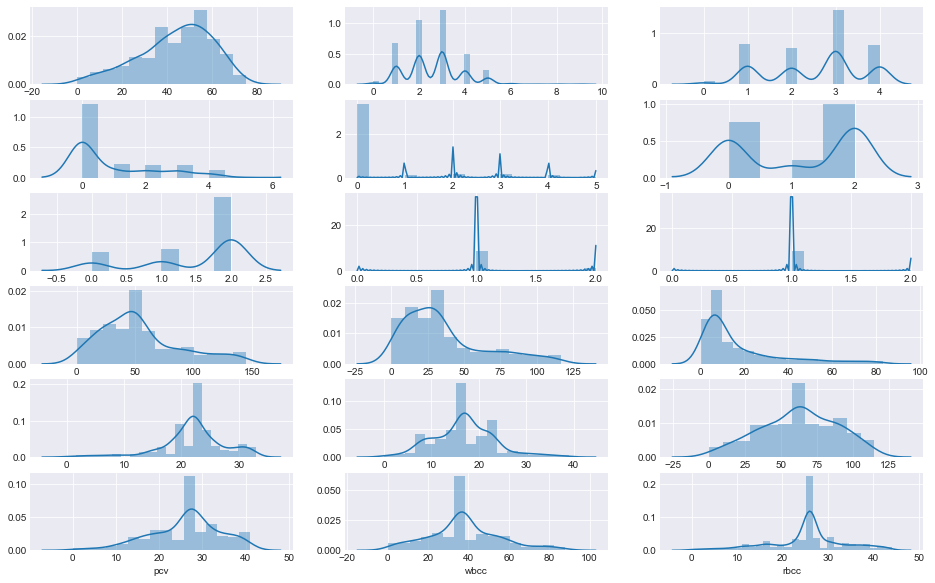

In [18]:
# To get the distributions of different columns
fig, axes = plt.subplots(6,3,figsize=(16,10))
axes = axes.reshape(-1)
numeric_cols = df.select_dtypes(exclude=['object']).columns
for i,col in enumerate(numeric_cols):
    sns.distplot(df[col],ax=axes[i])
plt.tight_layout()

Too many skewness so we'll use box cox transformation for all variables.

## Multi-variate plots

Regression Plot

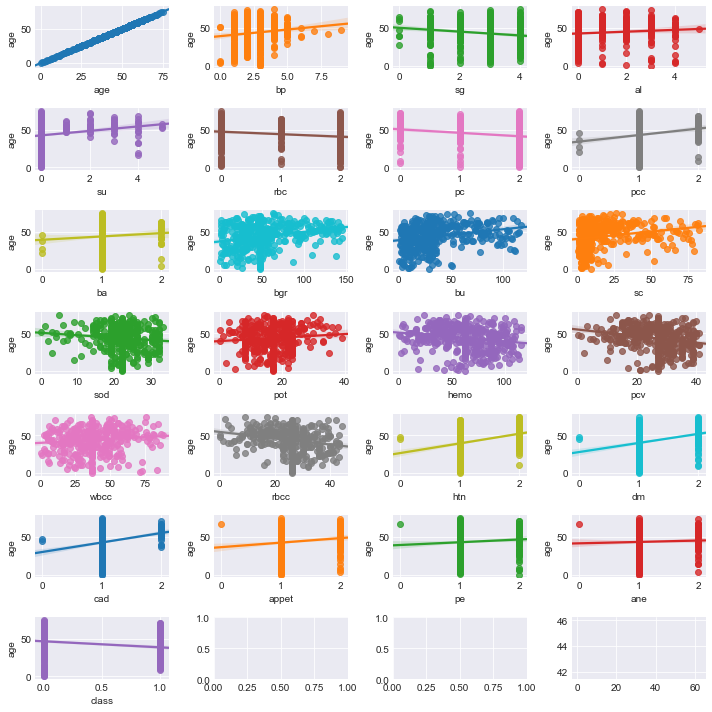

In [19]:
# To get the regression plot
fig, axes = plt.subplots(7,4,figsize=(10,10))
axes = axes.reshape(-1)
numeric_cols = df.select_dtypes(exclude=['object']).columns
for i,col in enumerate(numeric_cols):
    sns.regplot(df[col],df.age,ax=axes[i])
plt.tight_layout()

Correlations

In [20]:
# To get the correlations
df[numeric_cols].corr().sort_values('class',ascending=False)[['class']]

,class
class,1.000000
hemo,0.744538
pcv,0.675038
sg,0.659504
rbc,0.629978
rbcc,0.577383
sod,0.473039
pc,0.403575
pot,-0.059101
wbcc,-0.178293


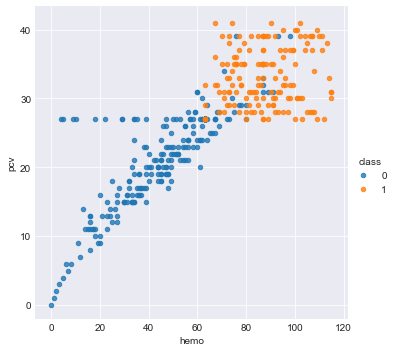

In [21]:
sns.lmplot('hemo', 'pcv', data = df,  hue = 'class', palette = None, fit_reg = False, scatter_kws = {'s': 20})

## Processing the data for Modelling

### Applying BoxCox Transformation

In [22]:
X = df.drop('class',axis=1)
y = df['class']


print(type(X), X.shape)
print(type(y), y.shape)

<class 'pandas.core.frame.DataFrame'> (400, 24)
<class 'pandas.core.series.Series'> (400,)


In [23]:
numeric_feats = X.select_dtypes(exclude = 'object')

In [24]:
# Check the skew of all numerical features
skewed_feats = numeric_feats
skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness.Skew) > 0.5]
skewness


Skew in numerical features: 



,Skew
su,2.689919
cad,2.458400
ba,2.303751
pcc,1.853386
ane,1.828384
sc,1.667286
pe,1.480501
appet,1.369700
al,1.175658
bu,1.101965


In [25]:
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 17 skewed numerical features to Box Cox transform


In [26]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    X[feat] += 1
    X[feat] = boxcox1p(df[feat], lam)
    
#df[skewed_features] = np.log1p(df[skewed_features])



## Transform categorical variables with pd.get_dummies

In [27]:
X.hemo = pd.Categorical(X.hemo)
X = pd.get_dummies(X)

## Applying log transformation to y

In [28]:
y = np.log(y)

## Splitting the data into train and test split

In [32]:
X = df.drop('class',axis=1)
y = df['class']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2003)

# # MODEL TRAINING KNN model

In [34]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

cross_val_score(knn, X_train_sc, y_train).mean()

0.9874801622288838

In [36]:
cross_val_score(KNeighborsClassifier(n_neighbors=6), X_train_sc, y_train).mean()

0.9905954270263916

In [37]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
knn.score(X_test_sc, y_test)

0.9875

## logistic Model

In [140]:
#Let's drop the target coloumn before we do train test split
X = df.drop('class',axis=1).values
y = df['class'].values


In [136]:
count_no_sub = len(df[df['class']==0])
count_sub = len(df[df['class']==1])
print(count_no_sub)
print(count_sub )

250
150


In [139]:
y = np.log(df['class'])


In [141]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2003)

In [142]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [143]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Testing the Model

True Positives: 119
False Positives: 0
False Negatives: 0
True Negatives: 201

Accuracy on the training set: 1.0


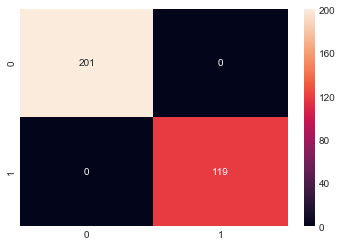

In [104]:
# Testing the model
from sklearn.metrics import classification_report, confusion_matrix
train_preds = classifier.predict(X_train)
cm = confusion_matrix(y_train, train_preds)
tn, fn, fp, tp = cm.ravel()

print('True Positives: {}'.format(tp) + '\n' + 'False Positives: {}'.format(fp) + '\n' + 
      'False Negatives: {}'.format(fn) + '\n' + 'True Negatives: {}'.format(tn) + '\n')
print('Accuracy on the training set: {}'.format(classifier.score(X_train, y_train)))

sns.heatmap(cm, annot = True, fmt = 'd')

True Positives: 31
False Positives: 0
False Negatives: 0
True Negatives: 49

Accuracy on the test set: 1.0


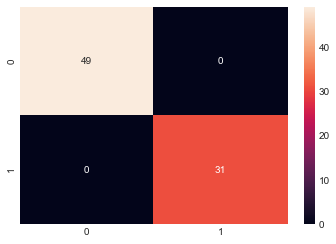

In [105]:
test_preds = classifier.predict(X_test)
cm = confusion_matrix(y_test, test_preds)
tn, fn, fp, tp = cm.ravel()

print('True Positives: {}'.format(tp) + '\n' + 'False Positives: {}'.format(fp) + '\n' + 
      'False Negatives: {}'.format(fn) + '\n' + 'True Negatives: {}'.format(tn) + '\n')
print('Accuracy on the test set: {}'.format(classifier.score(X_test, y_test)))
sns.heatmap(cm, annot = True, fmt = 'd')

In [106]:
print(classification_report(y_test, test_preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       1.00      1.00      1.00        31

avg / total       1.00      1.00      1.00        80



In [107]:
# Visualizing the 'Decision Boundary'
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X1.shape

(841, 657)

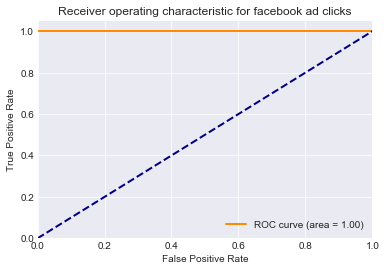

In [108]:
# Plotting an ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train, classifier.predict(X_train))
fpr
thresholds

roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for facebook ad clicks')
plt.legend(loc="lower right")
plt.show()

In [51]:
fpr, tpr, thresholds = roc_curve(y_train, classifier.predict(X_train))
fpr
thresholds

roc_auc = auc(fpr, tpr)

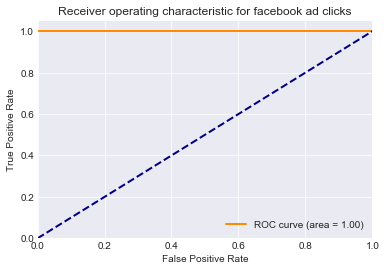

In [52]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for facebook ad clicks')
plt.legend(loc="lower right")
plt.show()

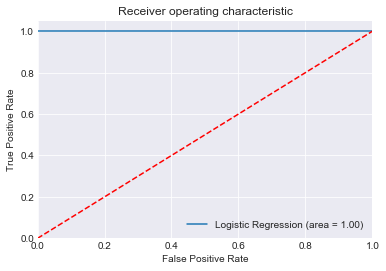

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## SVM Model

training the model

In [198]:
X = df.drop('class',axis=1)
y = df['class']

In [199]:
#Let's drop the target coloumn before we do train test split
hemo_pcv = df[['hemo', 'pcv']].as_matrix()
type_model = np.where(df['class']== 1)

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [200]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [201]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
X, y = make_classification(n_features=6, random_state=0)
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(classifier.coef_)

[[ 7.06010183e-02 -1.11119435e-01  4.41929150e-01 -6.91185618e-01
  -7.42341197e-02  6.92108706e-01 -7.44272657e-03 -1.12410738e-01
   3.46944695e-17 -2.58476579e-01 -1.79297960e-01 -2.04383366e-01
  -1.87111454e-02  2.38771915e-02  4.08077106e-01  3.84447246e-01
   1.66827457e-01  1.78839214e-01 -2.45699706e-01 -2.66784371e-01
   9.02056208e-17 -3.78558214e-01 -1.68943654e-01  1.31838984e-16]]


In [202]:
print(classifier.intercept_)

[-1.35741052]


In [203]:
print(y_pred)

[0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1]


In [168]:
w = classifier.coef_[0]
a = w[0]/w[1]
xx = np.linspace(5,30)
yy = a * xx - (classifier.intercept_[0]/ w[1])


b = classifier.support_vectors_[0]
yy_down = a * xx +(b[1] - a * b[0])
b = classifier.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [196]:
X = df.drop('class',axis=1).values
y = df['class'].values
sns.lmplot(df['hemo'],df['su'], data = df, hue = 'class', palette = 'set1', fit_reg = True, scatter_kws = {'s': 50})
plt.plot(xx, yy, linewidth= 2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up,   'k--')
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=50, facecolors= 'none' )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [257]:
zx= (-1.35741052 +( 7.06010183e-02 * df['age']))

In [267]:
p_= np.exp(zx) / (zx) + 1

In [266]:
y_= np.log(p_/1-p_)


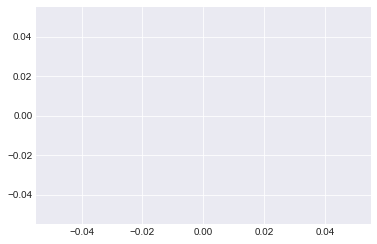

In [263]:

plt.plot(p_,y_)

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  0]
 [ 0 38]]


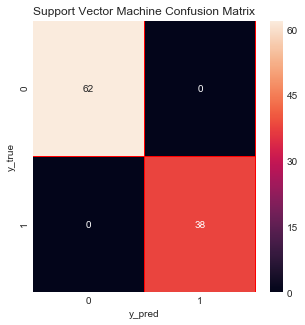

In [63]:
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

True Positives: 38
False Positives: 0
False Negatives: 0
True Negatives: 62

Accuracy on the test set: 1.0


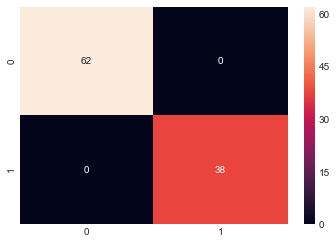

In [64]:
test_preds = classifier.predict(X_test)
cm = confusion_matrix(y_test, test_preds)
tn, fn, fp, tp = cm.ravel()

print('True Positives: {}'.format(tp) + '\n' + 'False Positives: {}'.format(fp) + '\n' + 
      'False Negatives: {}'.format(fn) + '\n' + 'True Negatives: {}'.format(tn) + '\n')
print('Accuracy on the test set: {}'.format(classifier.score(X_test, y_test)))
sns.heatmap(cm, annot = True, fmt = 'd')

In [191]:
np.array

<function numpy.array>